In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
 num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
                             train_data[0]])


550378/550378 [==============================] - 0s 0us/step


In [8]:
import numpy as np
from tensorflow.keras.utils import to_categorical

def vect_sec(sec,demencion=10000):
    result = np.zeros((len(sec), demencion))

    for i,sec in enumerate(sec):
        result[i,sec]=1
    return result
x_train = vect_sec(train_data)
x_test = vect_sec(test_data)
hot_y_train = to_categorical(train_labels)
hot_y_test = to_categorical(test_labels)


In [9]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))


In [10]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = hot_y_train[:1000]
partial_y_train = hot_y_train[1000:]
histry=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 30ms/step - loss: 2.7388 - accuracy: 0.4977 - val_loss: 1.8158 - val_accuracy: 0.6250
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.5347 - accuracy: 0.6854 - val_loss: 1.3477 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.1674 - accuracy: 0.7473 - val_loss: 1.1526 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.9469 - accuracy: 0.7964 - val_loss: 1.0453 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.7852 - accuracy: 0.8274 - val_loss: 0.9906 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6566 - accuracy: 0.8561 - val_loss: 0.9182 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5484 - accuracy: 0.8816 - val_loss: 0.8966 - val_accuracy: 0.8120
Epoch 8/20
16

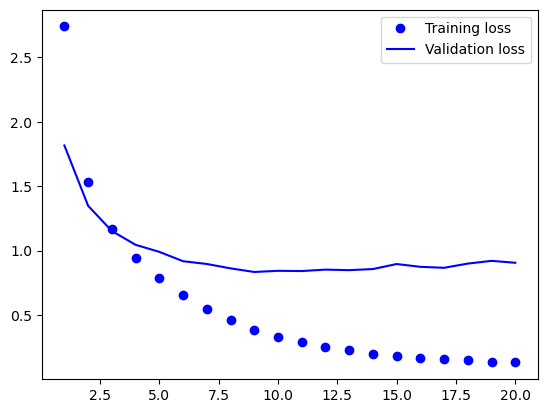

In [11]:
import matplotlib.pyplot as plt
loss = histry.history['loss']
val_loss = histry.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

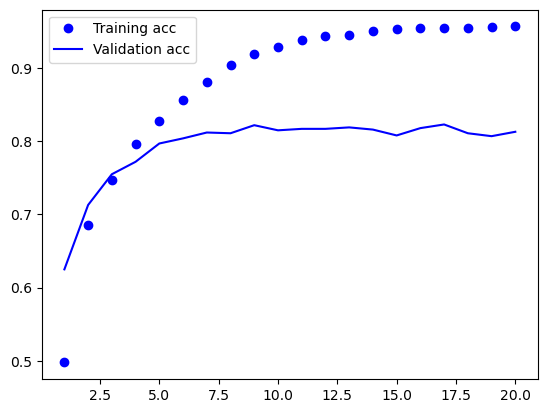

In [12]:
acc = histry.history['accuracy']
val_acc = histry.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()
plt.show()


In [13]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))
results=model.evaluate(x_test,hot_y_test)

Epoch 1/9
16/16 [==============================] - 1s 23ms/step - loss: 2.7895 - accuracy: 0.5193 - val_loss: 1.8592 - val_accuracy: 0.6230
Epoch 2/9
16/16 [==============================] - 0s 14ms/step - loss: 1.5331 - accuracy: 0.6845 - val_loss: 1.3782 - val_accuracy: 0.6980
Epoch 3/9
16/16 [==============================] - 0s 13ms/step - loss: 1.1667 - accuracy: 0.7481 - val_loss: 1.1921 - val_accuracy: 0.7300
Epoch 4/9
16/16 [==============================] - 0s 13ms/step - loss: 0.9569 - accuracy: 0.7905 - val_loss: 1.0849 - val_accuracy: 0.7500
Epoch 5/9
16/16 [==============================] - 0s 13ms/step - loss: 0.7915 - accuracy: 0.8264 - val_loss: 1.0013 - val_accuracy: 0.7860
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.6570 - accuracy: 0.8584 - val_loss: 0.9538 - val_accuracy: 0.7940
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.5449 - accuracy: 0.8866 - val_loss: 0.9168 - val_accuracy: 0.7990
Epoch 8/9
16/16 [===

In [17]:
pred=model.predict(x_test)
np.argmax(pred[0])


71/71 [==============================] - 0s 1ms/step


3